## Upper Confidence Bound (UCB)

In Reinforcement learning, the agent or decision-maker generates its training data by interacting with the world. The agent must learn the consequences of its actions through trial and error, rather than being explicitly told the correct action.

#### Multi-Armed Bandit Problem
Before going to learn the multi-armed bandit problem, first, take a look at the exploration vs. exploitation dilemma. This dilemma exists in many aspects of our life. Well, say you take your lunch at your favorite restaurant every day as you are confident about what you get from there is good. But you may be missing the chances of discovering even a better option. If you explore all the restaurants in your locality one by one, the probability of tasting the worst food in your life would be pretty high. But then again, there is also a probability that you get an even better option! This dilemma is called exploration vs. exploitation dilemma. Now lets go to the classic example of this dilemma- the Multi-Armed Bandit Problem

**What is the Multi-Armed Bandit Problem?**

In Reinforcement Learning, we use Multi-Armed Bandit Problem to formalize the notion of decision-making under uncertainty using k-armed bandits. A decision-maker or agent is present in Multi-Armed Bandit Problem to choose between k-different actions and receives a reward based on the action it chooses. Bandit problem is used to describe fundamental concepts in reinforcement learning, such as rewards, timesteps, and values.

Imagin a slot machine (also known as a bandit with two levers). We assume that each lever has a separate distribution of rewards and there is at least one lever that generates maximum reward.

The probability distribution for the reward corresponding to each lever is different and is unknown to the gambler(decision-maker). Hence, the goal here is to identify which lever to pull to get the maximum reward after a given set of trials.

For Example:
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126003840/Screenshot-2020-01-26-at-12.36.08-AM1.png">

Imagine an online advertising trial where an advertiser wants to measure the click-through rate of three different ads for the same product. Whenever a user visits the website, the advertiser displays an ad at random. The advertiser then monitors whether the user clicks on the ad or not. After a while, the advertiser notices that one ad seems to be working better than the others. The advertiser must now decide between sticking with the best-performing ad or continuing with the randomized study.
If the advertiser only displays one ad, then he can no longer collect data on the other two ads. Perhaps one of the other ads is better, it only appears worse due to chance. If the other two ads are worse, then continuing the study can affect the click-through rate adversely. This advertising trial exemplifies decision-making under uncertainty.
In the above example, the role of the agent is played by an advertiser. The advertiser has to choose between three different actions, to display the first, second, or third ad. Each ad is an action. Choosing that ad yields some unknown reward. Finally, the profit of the advertiser after the ad is the reward that the advertiser receives.

<img src="https://www.aionlinecourse.com/uploads/tutorials/2018/09/21_ucb_1.png">

**Action-Values**

For the advertiser to decide which action is best, we must define the value of taking each action. We define these values using the action-value function using the language of probability. The value of selecting an action $q*(a)$ is defined as the expected reward $R_t$ we receive when taking an action a from the possible set of actions.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126010253/Screenshot-2020-01-26-at-1.00.18-AM.png">

The goal of the agent is to maximize the expected reward by selecting the action that has the highest action-value.

**Action-value Estimate**

Since the value of selecting an action i.e. $Q*(a)$ is not known to the agent, so we will use the sample-average method to estimate it.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126012645/Screenshot-2020-01-26-at-1.26.22-AM.png">

**Exploration vs Exploitation**

- **Greedy Action**: When an agent chooses an action that currently has the largest estimated value. The agent exploits its current knowledge by choosing the greedy action.
- **Non-Greedy Action**: When the agent does not choose the largest estimated value and sacrifice immediate reward hoping to gain more information about the other actions.
- **Exploration**: It allows the agent to improve its knowledge about each action. Hopefully, leading to a long-term benefit.
- **Exploitation**: It allows the agent to choose the greedy action to try to get the most reward for short-term benefit. A pure greedy action selection can lead to sub-optimal behaviour.

A dilemma occurs between exploration and exploitation because an agent can not choose to both explore and exploit at the same time. Hence, we use the Upper Confidence Bound algorithm to solve the exploration-exploitation dilemma

**Upper Confidence Bound Action Selection**

Upper-Confidence Bound action selection uses uncertainty in the action-value estimates for balancing exploration and exploitation. Since there is inherent uncertainty in the accuracy of the action-value estimates when we use a sampled set of rewards thus UCB uses uncertainty in the estimates to drive exploration.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126015702/Screenshot-2020-01-26-at-1.56.32-AM.png">

$Q_t(a)$ here represents the current estimate for action a at time $t$. We select the action that has the highest estimated action-value plus the upper-confidence bound exploration term.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126021016/Screenshot-2020-01-26-at-2.08.45-AM.png">

$Q(A)$ in the above picture represents the current action-value estimate for action $A$. The brackets represent a confidence interval around $Q*(A)$ which says that we are confident that the actual action-value of action $A$ lies somewhere in this region.

The lower bracket is called the lower bound, and the upper bracket is the upper bound. The region between the brackets is the confidence interval which represents the uncertainty in the estimates. If the region is very small, then we become very certain that the actual value of action A is near our estimated value. On the other hand, if the region is large, then we become uncertain that the value of action A is near our estimated value.

The **Upper Confidence Bound** follows the principle of optimism in the face of uncertainty which implies that if we are uncertain about an action, we should optimistically assume that it is the correct action.

For example, let’s say we have these four actions with associated uncertainties in the picture below, our agent has no idea which is the best action. So according to the UCB algorithm, it will optimistically pick the action that has the highest upper bound i.e. $A$. By doing this either it will have the highest value and get the highest reward, or by taking that we will get to learn about an action we know least about.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126022459/Screenshot-2020-01-26-at-2.24.37-AM.png">

Let’s assume that after selecting the action A we end up in a state depicted in the picture below. This time UCB will select the action B since $Q(B)$ has the highest upper-confidence bound because it’s action-value estimate is the highest, even though the confidence interval is small.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126023259/Screenshot-2020-01-26-at-2.32.38-AM.png">

Initially, UCB explores more to systematically reduce uncertainty but its exploration reduces over time. Thus we can say that UCB obtains greater reward on average than other algorithms such as Epsilon-greedy, Optimistic Initial Values, etc.




References and more [geeksforgeeks](https://www.geeksforgeeks.org/upper-confidence-bound-algorithm-in-reinforcement-learning/) and [wikipedia](https://en.wikipedia.org/wiki/Reinforcement_learning)

## Implementation

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200126003840/Screenshot-2020-01-26-at-12.36.08-AM1.png">

Imagine an online advertising trial where an advertiser wants to measure the click-through rate of three different ads for the same product. Whenever a user visits the website, the advertiser displays an ad at random. The advertiser then monitors whether the user clicks on the ad or not. After a while, the advertiser notices that one ad seems to be working better than the others. The advertiser must now decide between sticking with the best-performing ad or continuing with the randomized study.
If the advertiser only displays one ad, then he can no longer collect data on the other two ads. Perhaps one of the other ads is better, it only appears worse due to chance. If the other two ads are worse, then continuing the study can affect the click-through rate adversely. This advertising trial exemp lifies decision-making under uncertainty.
In the above example, the role of the agent is played by an advertiser. The advertiser has to choose between three different actions, to display the first, second, or third ad. Each ad is an action. Choosing that ad yields some unknown reward. Finally, the profit of the advertiser after the ad is the reward that the advertiser receives.
We take an example of an online advertising campaign dataset where we have 10 different versions of a similar ad. You see the dataset looks similar to that of a multi-armed bandit problem!

Let's have a quick check on our multi-armed bandit problem

<img src="https://www.aionlinecourse.com/uploads/tutorials/2018/09/21_ucb_1.png">

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [3]:
# Implementing Random Selection
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

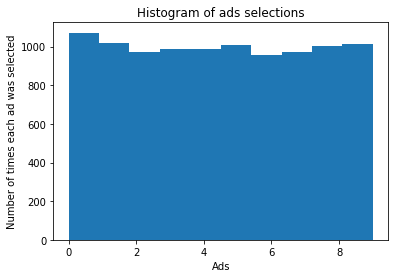

Total Reward:  1220


In [4]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


print("Total Reward: ",total_reward)

### Implementing UCB
As we don't have any prior knowledge about the selection of each ad, we will take the first 10 rounds as trial rounds. So, we set the if condition:  if (numbers_of_selections[i] > 0) so that the ads are selected at least once before entering into the main algorithm.


 
Then we implement the second step of the algorithm, computing the average reward of each ad i up to round n and the upper confidence bound for each ad.

Here we applied a trick in else condition by taking the variable upper_bound  to a huge number. This is because we want the first 10 rounds as trial rounds where the 10 ads are selected at least once. This trick will help us to do so.

After 10 trial rounds, the algorithm will work as the steps explained earlier.

<img src="https://www.aionlinecourse.com/uploads/tutorials/2018/09/21_ucb_2.png">

In [5]:
# Implementing UCB
N = 10000 # number of records
d = 10    # number of ads

ads_selected = []    # is used to append the different types of ads selected in each round
numbers_of_selections = [0] * d    # is used to count the number of time an ad was selected ((Ni(n)))
sums_of_rewards = [0] * d   # is used to calculate the cumulative sum of rewards at each round ((Ri(n)))
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

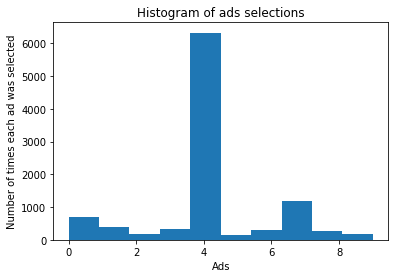

Total Reward:  2178


In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

print("Total Reward: ",total_reward)

From the above visualization, we can see that the fourth ad got the highest click. So our model advice us to place the fourth version of the ad to the user for getting the highest number of clicks